In [10]:
# 데이터셋 압축 풀기
# !unzip -uq "roi_500.zip" # 폴더 이름 roi

In [1]:
# 라이브러리 불러오기

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Reshape, Permute, Activation, Input, merge
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

import sys
import os
import glob
import cv2, numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dt

In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sessions = tf. Session(config=config)

In [3]:

# CNN model
# cnn2

from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 3

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(250, 250, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 250, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 250, 250, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 250, 250, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 128)     204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 128)   

In [4]:
# ImagedataGenerator 불러오기
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train data load 
train_set = train_datagen.flow_from_directory('roi/train/',
                                              target_size=(250, 250),  
                                              class_mode='categorical', 
                                              batch_size=32)

# val data load 
val_set = val_datagen.flow_from_directory('roi/val/', 
                                            target_size=(250, 250), 
                                            class_mode='categorical', 
                                            batch_size=32) 

# test data load
test_set = test_datagen.flow_from_directory('roi/test/',
                                           target_size=(250, 250),
                                           class_mode='categorical',
                                           batch_size=32,
                                           shuffle=False)

# fit model
history = model.fit_generator(train_set,
                              epochs = 30,
                              steps_per_epoch=128,
                             validation_data = val_set)

Found 34075 images belonging to 3 classes.
Found 3806 images belonging to 3 classes.
Found 4205 images belonging to 3 classes.

Epoch 1/30
128/128 [==============================] - 65s 508ms/step - loss: 0.7524 - accuracy: 0.6812 - val_loss: 1.3557 - val_accuracy: 0.2864
Epoch 2/30
128/128 [==============================] - 58s 453ms/step - loss: 0.3879 - accuracy: 0.8511 - val_loss: 1.9351 - val_accuracy: 0.2864
Epoch 3/30
128/128 [==============================] - 63s 496ms/step - loss: 0.2942 - accuracy: 0.8932 - val_loss: 2.0865 - val_accuracy: 0.3805
Epoch 4/30
128/128 [==============================] - 61s 476ms/step - loss: 0.2338 - accuracy: 0.9160 - val_loss: 1.4903 - val_accuracy: 0.6637
Epoch 5/30
128/128 [==============================] - 61s 476ms/step - loss: 0.2077 - accuracy: 0.9270 - val_loss: 0.4839 - val_accuracy: 0.8647
Epoch 6/30
128/128 [==============================] - 60s 472ms/step - loss: 0.1954 - accuracy: 0.9277 - val_loss: 0.3068 - val_accuracy: 0.8592
Ep

In [8]:
print(test_set.class_indices)

{'E01': 0, 'E02': 1, 'E03': 2}


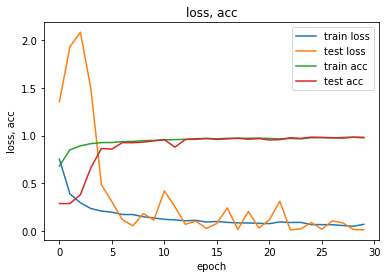

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('loss, acc')
plt.xlabel('epoch')
plt.ylabel('loss, acc')
plt.legend(['train loss', 'test loss', 'train acc', 'test acc'])
plt.show()

In [7]:
# model 검증
from sklearn.metrics import classification_report

pred = model.predict_generator(test_set)

val_preds = np.argmax(pred, axis=-1)
val_trues = test_set.classes

print(classification_report(val_trues,val_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1771
           1       0.99      0.96      0.97      1344
           2       0.99      0.98      0.98      1090

   micro avg       0.98      0.98      0.98      4205
   macro avg       0.98      0.98      0.98      4205
weighted avg       0.98      0.98      0.98      4205



In [ ]:
pred = model.predict_generator(pred_set)


val_preds = np.argmax(pred, axis=-1)
val_trues = pred_set.classes
cm = metrics.confusion_matrix(val_trues, val_preds)


labels = pred_set1.class_indices.keys()
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(val_trues, val_preds, labels=labels)

In [8]:
model.save('./save/cnn0525(imagegenerator, 250, haar cascade).h5')
print('모델 저장이 완료되었습니다.')

모델 저장이 완료되었습니다.
